In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
train_data = df.iloc[:108]
test_data = df.iloc[108:]

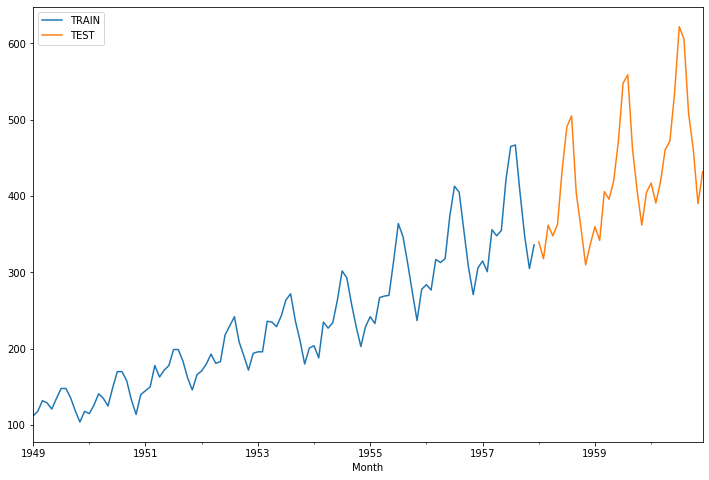

In [16]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

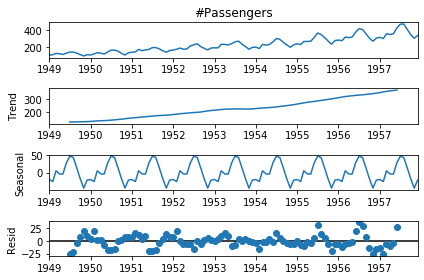

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(train_data['#Passengers']).plot();

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12 # The model will consider the last 12 months weighted average for forecasting
alpha = 2/(span+1)
model = SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=alpha)
test_predictions = model.forecast(36).rename('SES Forecast')

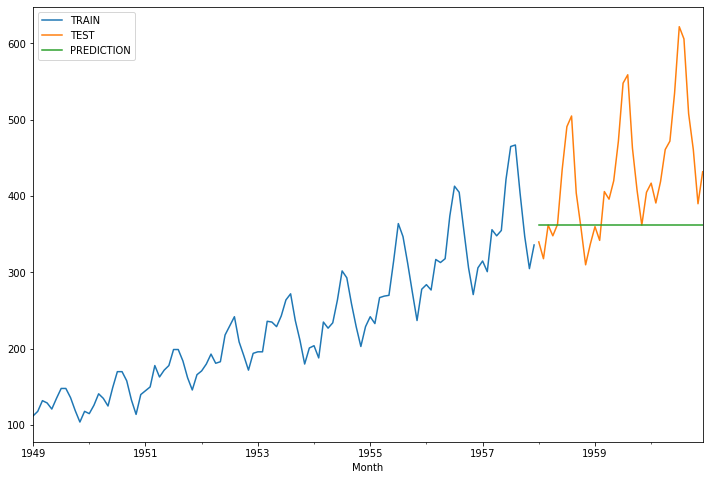

In [19]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [20]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test_data['#Passengers'],test_predictions))
print("RMS Error is ",rms_error)

RMS Error is  102.76000445873636


In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
double_model = ExponentialSmoothing(train_data['#Passengers'],trend='add').fit()
test_predictions = double_model.forecast(36).rename('DES Forecast')

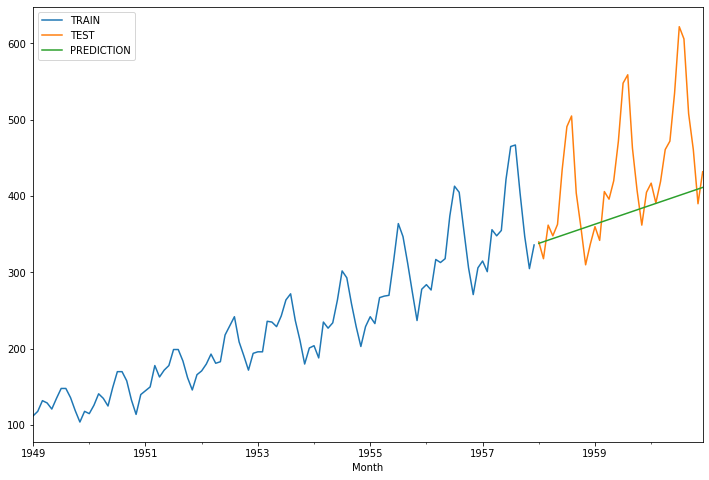

In [22]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [23]:
rms_error = np.sqrt(mean_squared_error(test_data['#Passengers'],test_predictions))
print("RMS Error for DES is ",rms_error)

RMS Error for DES is  87.7250629876231


In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model = ExponentialSmoothing(train_data['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = triple_model.forecast(36).rename('TES Forecast')

/Users/steven/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


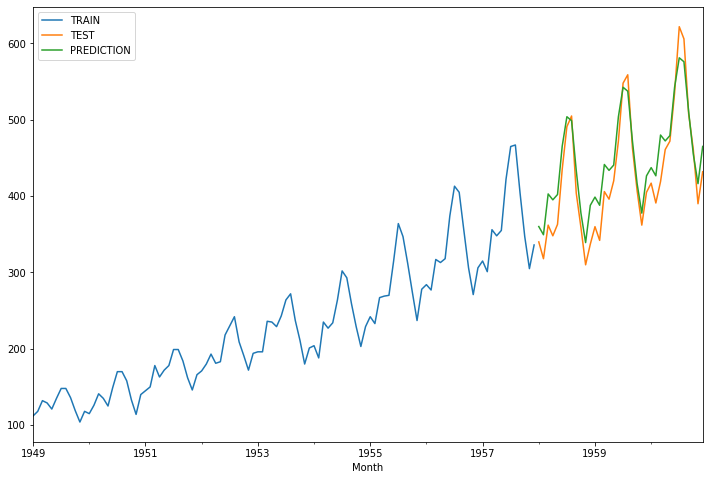

In [25]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [26]:
rms_error = np.sqrt(mean_squared_error(test_data['#Passengers'],test_predictions))
print("RMS Error for TES is ",rms_error)

RMS Error for TES is  29.706907573769204
